In [2]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
from bs4 import BeautifulSoup

url = "https://www.ligue1.fr/classement?seasonId=2019-2020&matchDay=27"
j=input('Quelle journee ? (0 pour derniere journee) : ')
if j:url = "https://www.ligue1.fr/classement?seasonId=2019-2020&matchDay="+str(j)

result = requests.get(url, verify=False)
src = result.content

soup = BeautifulSoup(src, 'lxml')
#print(soup.prettify())

Quelle journee ? (0 pour derniere journee) : 
<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="fr-FR">
 <!--<![endif]-->
 <head>
  <link href="/-/media/Feature/Experience-Accelerator/Bootstrap/Bootstrap/Styles/optimized-min.css?t=20200129T015528Z" rel="stylesheet"/>
  <link href="/-/media/Base-Themes/Core-Libraries/styles/optimized-min.css?t=20200129T015533Z" rel="stylesheet"/>
  <link href="/-/media/Base-Themes/Main-Theme/styles/optimized-min.css?t=20200129T015537Z" rel="stylesheet"/>
  <link href="/-/media/Themes/LFP/Ligue1/Ligue1/Styles/optimized-min.css?t=20200130T092534Z" rel="stylesheet"/>
  <meta content="637187439575461418" name="VIcurrentDateTime"/>
  <script src="/layouts/system/VisitorIdentification.js" type="text/javascript">
  </script>
  <script l

In [3]:
title = soup.find(class_ = 'title')
#print(title.div)
week = title.div.contents[2].strip()
print(week)

Journée 27


In [4]:
page = soup.find(class_='container page-section')
#print(page.prettify())

In [5]:
table = page.find(class_='classement-table')
#print(table.prettify())

In [6]:
head = table.find(class_='classement-table-head')
#print(head.prettify())

span_head = head.find_all('span')
#for s in span_head:
#    print(s.contents[0], end='\t')

del(span_head[3])
del(span_head[4])
    
#print(span_head)

In [7]:
body = table.find(class_='classement-table-body')
#print(body.prettify())

In [8]:
li_tags = body.find_all('li')
#print(len(li_tags), li_tags[1].prettify())

In [9]:
def create_row(position):
    col = li_tags[position].find_all('div')
    row = {}
    for k, c in enumerate(col):
        if k == 10 : break
        content = c.contents[0]
        if k == 1 : content = c.contents[3].find('span').contents[0]
        #print(k, span_head[k].contents[0], content)
        row[span_head[k].contents[0]] = content
    #print(row)
    return row
rows = []    
for n in range(20):
    rows.append(create_row(n))

In [10]:
import pandas as pd
print(week)
df  = pd.DataFrame.from_dict(rows)
df

Journée 27


,POSITION,CLUB,POINTS,JOUÉS,GAGNÉS,NULS,PERDUS,BUTS POUR,BUTS CONTRE,DIFF.
0,1,PARIS SAINT-GERMAIN,68,27,22,2,3,75,24,+51
1,2,OLYMPIQUE DE MARSEILLE,55,27,16,7,4,39,27,+12
2,3,STADE RENNAIS FC,47,27,14,5,8,33,24,+9
3,4,LOSC LILLE,46,27,14,4,9,34,27,+7
4,5,OLYMPIQUE LYONNAIS,40,27,11,7,9,42,26,+16
5,6,MONTPELLIER HÉRAULT SC,40,27,11,7,9,35,29,+6
6,7,AS MONACO,40,27,11,7,9,43,42,+1
7,8,STADE DE REIMS,38,27,9,11,7,25,21,+4
8,9,OGC NICE,38,27,10,8,9,39,37,+2
9,10,RC STRASBOURG ALSACE,38,27,11,5,11,32,32,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   POSITION     20 non-null     object
 1   CLUB         20 non-null     object
 2   POINTS       20 non-null     object
 3   JOUÉS        20 non-null     object
 4   GAGNÉS       20 non-null     object
 5   NULS         20 non-null     object
 6   PERDUS       20 non-null     object
 7   BUTS POUR    20 non-null     object
 8   BUTS CONTRE  20 non-null     object
 9   DIFF.        20 non-null     object
dtypes: object(10)
memory usage: 864.0+ bytes


In [12]:
#convert columns str to int
for i in range(2,10):
    #print(df.iloc[:,i])
    df.iloc[:,i]=df.iloc[:,i].astype('int') 
#type(df.iloc[0,1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   POSITION     20 non-null     object
 1   CLUB         20 non-null     object
 2   POINTS       20 non-null     int32 
 3   JOUÉS        20 non-null     int32 
 4   GAGNÉS       20 non-null     int32 
 5   NULS         20 non-null     int32 
 6   PERDUS       20 non-null     int32 
 7   BUTS POUR    20 non-null     int32 
 8   BUTS CONTRE  20 non-null     int32 
 9   DIFF.        20 non-null     int32 
dtypes: int32(8), object(2)
memory usage: 864.0+ bytes


In [13]:
df.set_index('POSITION', drop=True, inplace=True)
df

,CLUB,POINTS,JOUÉS,GAGNÉS,NULS,PERDUS,BUTS POUR,BUTS CONTRE,DIFF.
POSITION,,,,,,,,,
1,PARIS SAINT-GERMAIN,68,27,22,2,3,75,24,51
2,OLYMPIQUE DE MARSEILLE,55,27,16,7,4,39,27,12
3,STADE RENNAIS FC,47,27,14,5,8,33,24,9
4,LOSC LILLE,46,27,14,4,9,34,27,7
5,OLYMPIQUE LYONNAIS,40,27,11,7,9,42,26,16
6,MONTPELLIER HÉRAULT SC,40,27,11,7,9,35,29,6
7,AS MONACO,40,27,11,7,9,43,42,1
8,STADE DE REIMS,38,27,9,11,7,25,21,4
9,OGC NICE,38,27,10,8,9,39,37,2


In [14]:
df.to_csv('ligue1_2020_27.csv', sep = ',')

In [16]:
# add column with computed values
df['Pts/J']=df.iloc[:,1]/df.iloc[:,2]
df['Bp/J']=df.iloc[:,6]/df.iloc[:,2]
df['Bc/J']=df.iloc[:,7]/df.iloc[:,2]
df

,CLUB,POINTS,JOUÉS,GAGNÉS,NULS,PERDUS,BUTS POUR,BUTS CONTRE,DIFF.,Pts/J,Bp/J,Bc/J
POSITION,,,,,,,,,,,,
1,PARIS SAINT-GERMAIN,68,27,22,2,3,75,24,51,2.518519,2.777778,0.888889
2,OLYMPIQUE DE MARSEILLE,55,27,16,7,4,39,27,12,2.037037,1.444444,1.000000
3,STADE RENNAIS FC,47,27,14,5,8,33,24,9,1.740741,1.222222,0.888889
4,LOSC LILLE,46,27,14,4,9,34,27,7,1.703704,1.259259,1.000000
5,OLYMPIQUE LYONNAIS,40,27,11,7,9,42,26,16,1.481481,1.555556,0.962963
6,MONTPELLIER HÉRAULT SC,40,27,11,7,9,35,29,6,1.481481,1.296296,1.074074
7,AS MONACO,40,27,11,7,9,43,42,1,1.481481,1.592593,1.555556
8,STADE DE REIMS,38,27,9,11,7,25,21,4,1.407407,0.925926,0.777778
9,OGC NICE,38,27,10,8,9,39,37,2,1.407407,1.444444,1.370370


In [17]:
df.to_csv('ligue1_2020_extended.txt', sep = ',')

In [18]:
df.describe()

,POINTS,JOUÉS,GAGNÉS,NULS,PERDUS,BUTS POUR,BUTS CONTRE,DIFF.,Pts/J,Bp/J,Bc/J
count,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,37.100000,27.0,10.100000,6.800000,10.100000,34.000000,34.000000,0.000000,1.374074,1.259259,1.259259
std,11.715487,0.0,4.266146,2.483631,3.669218,11.507435,8.920703,17.041744,0.433907,0.426201,0.330396
min,13.000000,27.0,3.000000,2.000000,3.000000,21.000000,21.000000,-35.000000,0.481481,0.777778,0.777778
25%,30.500000,27.0,7.750000,5.000000,9.000000,27.500000,27.000000,-9.500000,1.129630,1.018519,1.000000
50%,37.500000,27.0,10.000000,7.000000,9.000000,32.500000,33.000000,0.500000,1.388889,1.203704,1.222222
75%,40.000000,27.0,11.000000,9.000000,12.000000,39.000000,38.250000,6.250000,1.481481,1.444444,1.416667
max,68.000000,27.0,22.000000,11.000000,20.000000,75.000000,56.000000,51.000000,2.518519,2.777778,2.074074


In [19]:
def moyVar(X):
    n = len(X)
    if n==0:
        return None
    else:
        s1, s2 = 0, 0
        for x in X:
            s1 = s1 + x
            s2 = s2 + x*x
        m = s1/n
        return m,s2/n - m**2

def moyVarP(X, N):
    p1, p2 = len(X), len(N)
    if p1==0 or p2 != p1:
        return None
    else:
        s1, s2, n = 0, 0, 0
        for k in range(1,p1):
            n = n + N[k]
            z = N[k]*X[k]
            s1 = s1 + z
            s2 = s2 + z*X[k]
        m = s1/n
        return m,s2/n - m**2

In [20]:
moyenne,variance=moyVar(df.POINTS)
df2 = df[df.POINTS>moyenne]
df2

,CLUB,POINTS,JOUÉS,GAGNÉS,NULS,PERDUS,BUTS POUR,BUTS CONTRE,DIFF.,Pts/J,Bp/J,Bc/J
POSITION,,,,,,,,,,,,
1,PARIS SAINT-GERMAIN,68,27,22,2,3,75,24,51,2.518519,2.777778,0.888889
2,OLYMPIQUE DE MARSEILLE,55,27,16,7,4,39,27,12,2.037037,1.444444,1.000000
3,STADE RENNAIS FC,47,27,14,5,8,33,24,9,1.740741,1.222222,0.888889
4,LOSC LILLE,46,27,14,4,9,34,27,7,1.703704,1.259259,1.000000
5,OLYMPIQUE LYONNAIS,40,27,11,7,9,42,26,16,1.481481,1.555556,0.962963
6,MONTPELLIER HÉRAULT SC,40,27,11,7,9,35,29,6,1.481481,1.296296,1.074074
7,AS MONACO,40,27,11,7,9,43,42,1,1.481481,1.592593,1.555556
8,STADE DE REIMS,38,27,9,11,7,25,21,4,1.407407,0.925926,0.777778
9,OGC NICE,38,27,10,8,9,39,37,2,1.407407,1.444444,1.370370


In [21]:
import numpy as np
import matplotlib.pyplot as plt
l = len(df)
x = np.arange(l)
y = df.POINTS
plt.plot(x,y)
plt.plot(x,np.ones(l)*moyenne)
plt.plot(x,np.ones(l)*variance)
plt.show()

<Figure size 640x480 with 1 Axes>

In [22]:

def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def draw_stackedbar():
    N = 20
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5       # the width of the bars: can also be len(x) sequence
    p1 = plt.bar(ind, df['GAGNÉS'], width)
    p2 = plt.bar(ind, df['NULS'], width, bottom=df['GAGNÉS'])
    p3 = plt.bar(ind, df['PERDUS'], width, bottom=df['GAGNÉS']+df['NULS'])
    plt.legend((p1[0], p2[0], p3[0]), ('Gagnés', 'Nuls', 'Perdus'))
    plt.show()

def draw_groupedbar(df, cols):
    N = 20
    x = np.arange(N)  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, df[cols[0]], width, label=cols[0])
    rects2 = ax.bar(x , df[cols[1]], width, label=cols[1])
    rects3 = ax.bar(x + width, df[cols[2]], width, label=cols[2])
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Matchs')
    ax.set_title('Scores')
    ax.set_xticks(x)
    #ax.set_xticklabels(labels)
    ax.legend()
    # label each bar at top
    autolabel(ax, rects1)
    autolabel(ax, rects2)
    autolabel(ax, rects3)
    fig.tight_layout()
    plt.show()
    
def scatter(df,cols,factor=10):
    x = df[cols[0]]
    y = df[cols[1]]
    s, c = np.random.rand(2, 20)
    s = x*factor
    c = x+y
    fig, ax = plt.subplots()
    ax.scatter(x, y, s, c)
    ax.set_ylabel(cols[1])
    ax.set_xlabel(cols[0])
    plt.show()


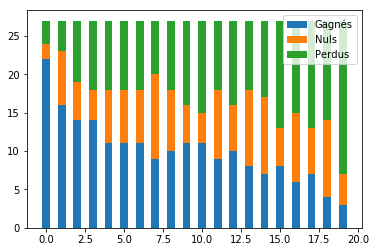

In [25]:
draw_stackedbar()

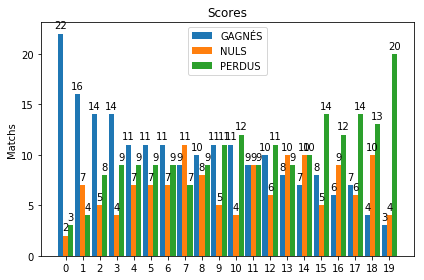

In [26]:
cols = ('GAGNÉS','NULS','PERDUS')
draw_groupedbar(df, cols)

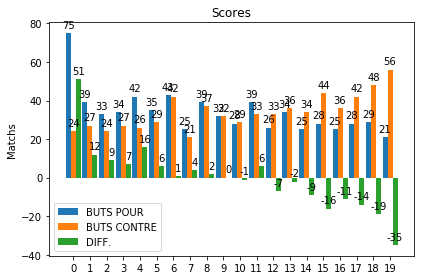

In [27]:
cols = ('BUTS POUR', 'BUTS CONTRE', 'DIFF.')
draw_groupedbar(df, cols)

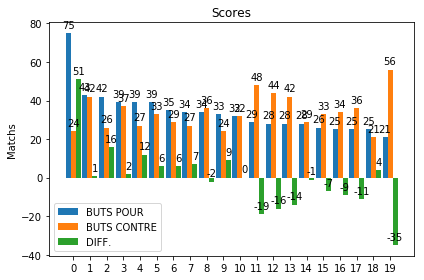

In [28]:
result = df.sort_values(by=['BUTS POUR'], ascending=[0])
draw_groupedbar(result, cols)

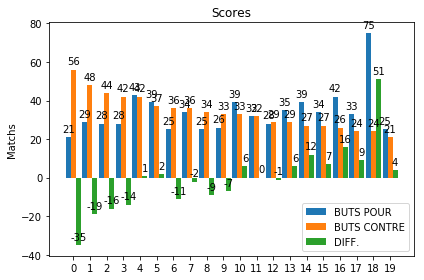

In [29]:
result = df.sort_values(by=['BUTS CONTRE'], ascending=[0])
draw_groupedbar(result, cols)

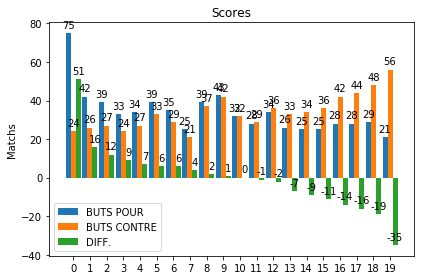

In [30]:
result = df.sort_values(by=['DIFF.'], ascending=[0])
draw_groupedbar(result, cols)

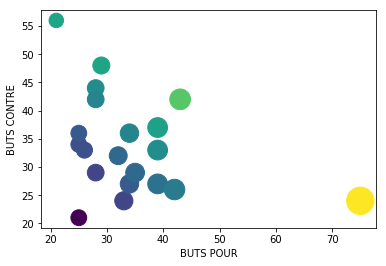

In [31]:
cols =('BUTS POUR', 'BUTS CONTRE')
scatter(df, cols)

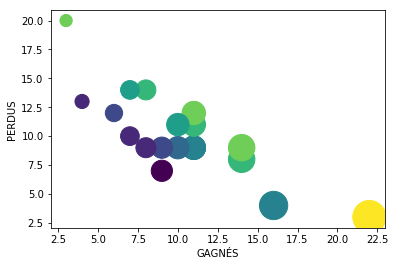

In [32]:
cols =('GAGNÉS', 'PERDUS')
scatter(df, cols, 50)